# bagging

In [53]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import numpy as np


bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

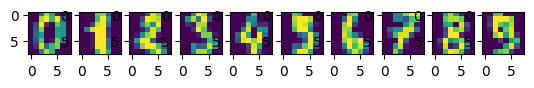

In [4]:
digits = load_digits()
# printing the first ten pics
fig = plt.figure()
for x, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,x+1)
    plt.imshow(digit)
plt.show()

In [6]:
X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)
accurcy = clf.score(X,y)
print(accurcy)

1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.90)
clf= tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accu = clf.score(X_test, y_test)
print(accu)


1.0


# **Build the variance of the value over 100 draws for the learning/test separation. What can we conclude?**
# then the correction

In [23]:
number = 100
accurcy_list = []
for i in range(number):
    X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.05)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    accurcy_list.append(clf.score(X_test, y_test))
    print(accurcy_list[i])

print(np.mean(accurcy_list), np.std(accurcy_list))

0.9111111111111111
0.7888888888888889
0.8444444444444444
0.7888888888888889
0.8444444444444444
0.8333333333333334
0.8666666666666667
0.9111111111111111
0.8222222222222222
0.7666666666666667
0.8666666666666667
0.8222222222222222
0.8444444444444444
0.8444444444444444
0.8888888888888888
0.8777777777777778
0.8222222222222222
0.8777777777777778
0.8111111111111111
0.8666666666666667
0.8
0.8
0.8888888888888888
0.8666666666666667
0.8555555555555555
0.8777777777777778
0.8666666666666667
0.8222222222222222
0.8777777777777778
0.8888888888888888
0.9111111111111111
0.8888888888888888
0.8444444444444444
0.8777777777777778
0.8
0.8555555555555555
0.8666666666666667
0.8888888888888888
0.8777777777777778
0.8333333333333334
0.8555555555555555
0.8777777777777778
0.8888888888888888
0.8333333333333334
0.8888888888888888
0.9222222222222223
0.8555555555555555
0.8222222222222222
0.8777777777777778
0.8111111111111111
0.8777777777777778
0.8
0.8444444444444444
0.9222222222222223
0.8333333333333334
0.8666666666666

# To compare, let's now build a bagging classifier on our data, still based on:DecisionTreeClassifier

In [27]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5,n_estimators=200)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accurcy = clf.score(X_test, y_test)
print(accurcy)

0.9777777777777777


# **Build the graph vs . What do you see?accuracyn_estimators**
# The error rate decreases with , but from a value it stabilizes, so we gain nothing from this value of , except that the algorithm becomes slower. In the following code we have taken to make the effect more visible.n_estimatorsn_estimatorstest_size = 0.5

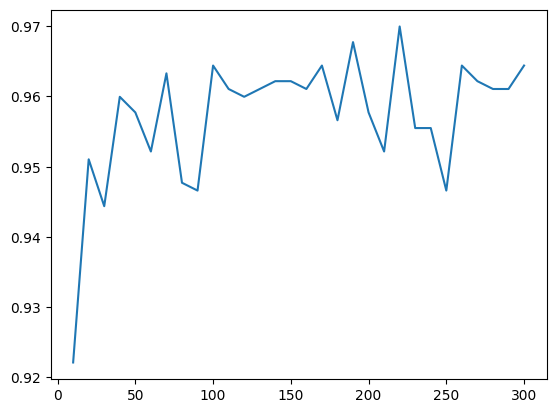

In [29]:
number = 30
accurcy_list = []
for i in range(number):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    predict = clf.predict(X_train)
    accurcy_list.append(clf.score(X_test, y_test))
plt.plot([10*(i+1) for i in range(number)], accurcy_list)
plt.show()

# **Vary the settings and . For which stocks do we get the best result? In particular, it can be used to carry out a systematic search.max_samplesmax_featuresGridSearchCV**
# To find good values for the parameters, we use cross-validation with , as explained in the lab on the evaluation and selection of decision models <tpEvaluationSelectionModels>_.GridSearchCV


In [37]:
digits = load_digits()
X,y = digits.data, digits.target
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.5)

pgrid = {"max_samples": [0.2, 0.4, 0.6, 0.8],
        "max_features": [0.2, 0.4, 0.6, 0.8]}

grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print("Best_score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

Best_score : 0.9276974416017798
max_samples: 0.8
max_features: 0.6


# **Random Forests**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.946229913473424


# **How does the value of the variable compare with the bagging case that uses the same number of trees (200 in our case)?accuracy**


In [48]:
# ID TREE Algo
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Descion Tree : " + str(clf.score(X_test,y_test)))

# BaggingClassifier
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Bagging (200 arbres) : " + str(clf.score(X_test,y_test)))

# Random forest
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Radnom Forest (200 arbres) : " + str(clf.score(X_test,y_test)))

Descion Tree : 0.7058096415327565
Bagging (200 arbres) : 0.9264524103831892
Radnom Forest (200 arbres) : 0.9381953028430161


# **Build the variance of the value over 100 draws for the learning/test separation. What can we conclude by comparing it with the previous section (bagging)?accuracy**

In [49]:
N = 10

bagging_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
    clf.fit(X_train, y_train)
    bagging_accuracies.append(clf.score(X_test,y_test))
print(np.mean(bagging_accuracies), np.std(bagging_accuracies))


rf_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))
print(np.mean(rf_accuracies), np.std(rf_accuracies))

0.9334816462736372 0.012444374879596879
0.9598442714126808 0.0077776845857233925


# **Build the graph vs . What do you see? At what value do we no longer improve?accuracyn_estimators**

10 0.914349276974416
20 0.9532814238042269
30 0.9588431590656284
40 0.9588431590656284
50 0.9710789766407119
60 0.9721913236929922
70 0.9666295884315906
80 0.9733036707452726
90 0.967741935483871
100 0.978865406006674
110 0.9710789766407119
120 0.9710789766407119
130 0.9733036707452726
140 0.9733036707452726
150 0.967741935483871
160 0.9733036707452726
170 0.9755283648498332
180 0.9744160177975528
190 0.967741935483871
200 0.9744160177975528
210 0.9744160177975528
220 0.9766407119021134
230 0.9766407119021134
240 0.9766407119021134
250 0.9733036707452726
260 0.978865406006674
270 0.978865406006674
280 0.9744160177975528
290 0.9721913236929922
300 0.9755283648498332


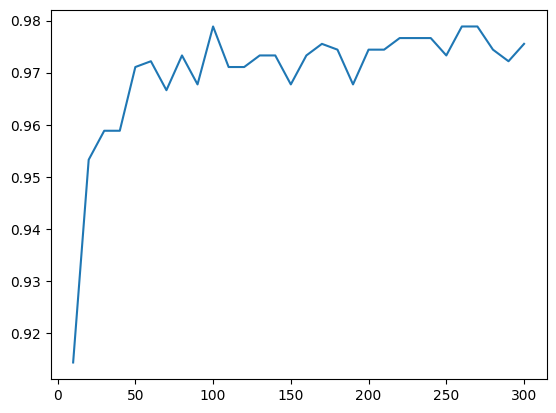

In [50]:
N = 30
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()

# **Look in the documentation for the ExtraTreesClassifier and redo the classification with this type of classifier. Compare with RandomForestClassifier.**
# Extra-Trees (Extremely Randomized Trees) randomize the construction of the tree even more and are used mainly for numerical data. Compared to random forests, they abandon the use of bootstrap samples and for each feature candidate choose a random cutoff threshold. The idea works quite well for learning problems that have a large number of features that vary continuously. Often their error rate is higher than random forests, the computation time is lower and the trees generated are larger.


In [52]:
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy=clf.score(X_test,y_test)
print("Random Forest: " + str(accuracy))

clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
print("Extra Trees : " + str(accuracy))

Random Forest: 0.967741935483871
Extra Trees : 0.978865406006674


# **Boosting**

In [55]:
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9171817058096415
